In [1]:
#import libraries
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

In [2]:
df_clv = pd.read_csv("CLV_Analysis_Dataset.csv")

In [3]:
df_clv.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [5]:
df_clv.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
df_clv.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02-03-2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# drop the Customer ID column
df_clv.drop(['Customer'], axis=1, inplace=True)

In [8]:
#Change object into categorical variable
df_clv['State'] = df_clv['State'].astype('category')
df_clv['Response'] = df_clv['Response'].astype('category')
df_clv['Coverage'] = df_clv['Coverage'].astype('category')
df_clv['Education'] = df_clv['Education'].astype('category')
df_clv['Effective To Date'] = df_clv['Effective To Date'].astype('category')
df_clv['EmploymentStatus'] = df_clv['EmploymentStatus'].astype('category')
df_clv['Gender'] = df_clv['Gender'].astype('category')
df_clv['Location Code'] = df_clv['Location Code'].astype('category')
df_clv['Marital Status'] = df_clv['Marital Status'].astype('category')
df_clv['Policy Type'] = df_clv['Policy Type'].astype('category')
df_clv['Policy'] = df_clv['Policy'].astype('category')
df_clv['Renew Offer Type'] = df_clv['Renew Offer Type'].astype('category')
df_clv['Sales Channel'] = df_clv['Sales Channel'].astype('category')
df_clv['Vehicle Class'] = df_clv['Vehicle Class'].astype('category')
df_clv['Vehicle Size'] = df_clv['Vehicle Size'].astype('category')

In [9]:
#Use category codes instead of strings
df_clv['State'] = df_clv['State'].cat.codes
df_clv['Response'] = df_clv['Response'].cat.codes
df_clv['Coverage'] = df_clv['Coverage'].cat.codes
df_clv['Education'] = df_clv['Education'].cat.codes
df_clv['Effective To Date'] = df_clv['Effective To Date'].cat.codes
df_clv['EmploymentStatus'] = df_clv['EmploymentStatus'].cat.codes
df_clv['Gender'] = df_clv['Gender'].cat.codes
df_clv['Location Code'] = df_clv['Location Code'].cat.codes
df_clv['Marital Status'] = df_clv['Marital Status'].cat.codes
df_clv['Policy Type'] = df_clv['Policy Type'].cat.codes
df_clv['Policy'] = df_clv['Policy'].cat.codes
df_clv['Renew Offer Type'] = df_clv['Renew Offer Type'].cat.codes
df_clv['Sales Channel'] = df_clv['Sales Channel'].cat.codes
df_clv['Vehicle Class'] = df_clv['Vehicle Class'].cat.codes
df_clv['Vehicle Size'] = df_clv['Vehicle Size'].cat.codes

In [10]:
df_clv.describe(include = ['category'])

ValueError: No objects to concatenate

Scale the columns before building tree

Model Building

In [11]:
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report, accuracy_score, precision_score, recall_score
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  roc_curve, auc
from   sklearn.model_selection  import  KFold, cross_val_score
from   sklearn.model_selection  import  train_test_split

In [13]:
X = df_clv[['State','Customer Lifetime Value','Coverage','Education', 
          'EmploymentStatus', 'Gender', 'Income', 'Location Code','Marital Status', 'Monthly Premium Auto',
            'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies',
           'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']]
y = df_clv[['Response']]

In [26]:
X5 = df_clv[["Coverage","Education","EmploymentStatus", "Policy Type", "Income","Renew Offer Type", "Customer Lifetime Value","Total Claim Amount"]]

In [28]:
y.shape

(9134, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [27]:
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=42, stratify = y)

In [12]:
X5_train.shape

(6393, 7)

In [31]:
y_train.shape

(6393, 1)

In [32]:
X_test.shape

(2741, 21)

In [33]:
y_test.shape

(2741, 1)

In [13]:
#This explains stratify=y
y_test['Response'].value_counts()

No     2348
Yes     393
Name: Response, dtype: int64

In [14]:
y_train['Response'].value_counts()

No     5478
Yes     915
Name: Response, dtype: int64

In [28]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_split = 5)

**TRAINING**

In [29]:
clf.fit(X5_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [30]:
predicted_train = clf.predict(X5_train)

In [31]:
#Metrics
#print("Training Data Balanced Accuracy:",metrics.balanced_accuracy_score(y_train, predicted_train))
print("Training Data Accuracy:",metrics.accuracy_score(y_train, predicted_train))
print("Training Data Precision:",metrics.precision_score(y_train, predicted_train))
print("Training Data Recall:",metrics.recall_score(y_train, predicted_train))

Training Data Accuracy: 0.8736117628656342
Training Data Precision: 0.8128654970760234
Training Data Recall: 0.15191256830601094


In [32]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5478
           1       0.81      0.15      0.26       915

    accuracy                           0.87      6393
   macro avg       0.84      0.57      0.59      6393
weighted avg       0.87      0.87      0.83      6393



**TESTING**

In [33]:
predicted_test = clf.predict(X5_test)

In [34]:
#print("Test Set Balanced Accuracy:",metrics.balanced_accuracy_score(y_test, predicted_test))
print("Test Set Accuracy:",metrics.accuracy_score(y_test, predicted_test))
print("Test Set Precision:",metrics.precision_score(y_test, predicted_test))
print("Test Set Recall:",metrics.recall_score(y_test, predicted_test))

Test Set Accuracy: 0.8755928493250639
Test Set Precision: 0.8333333333333334
Test Set Recall: 0.16539440203562342


In [35]:
measures_test      = classification_report(y_test, predicted_test) 
print("\nTesting data")
print(measures_test) 


Testing data
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2348
           1       0.83      0.17      0.28       393

    accuracy                           0.88      2741
   macro avg       0.86      0.58      0.60      2741
weighted avg       0.87      0.88      0.84      2741



{'State': 0.0, 'Customer Lifetime Value': 0.001894001955354895, 'Response': 0.4135381240393978, 'Coverage': 0.0, 'Education': 0.10050746108099066, 'Effective To Date': 0.3703510860696338, 'EmploymentStatus': 0.09987401850811496, 'Gender': 0.013835308346507882}


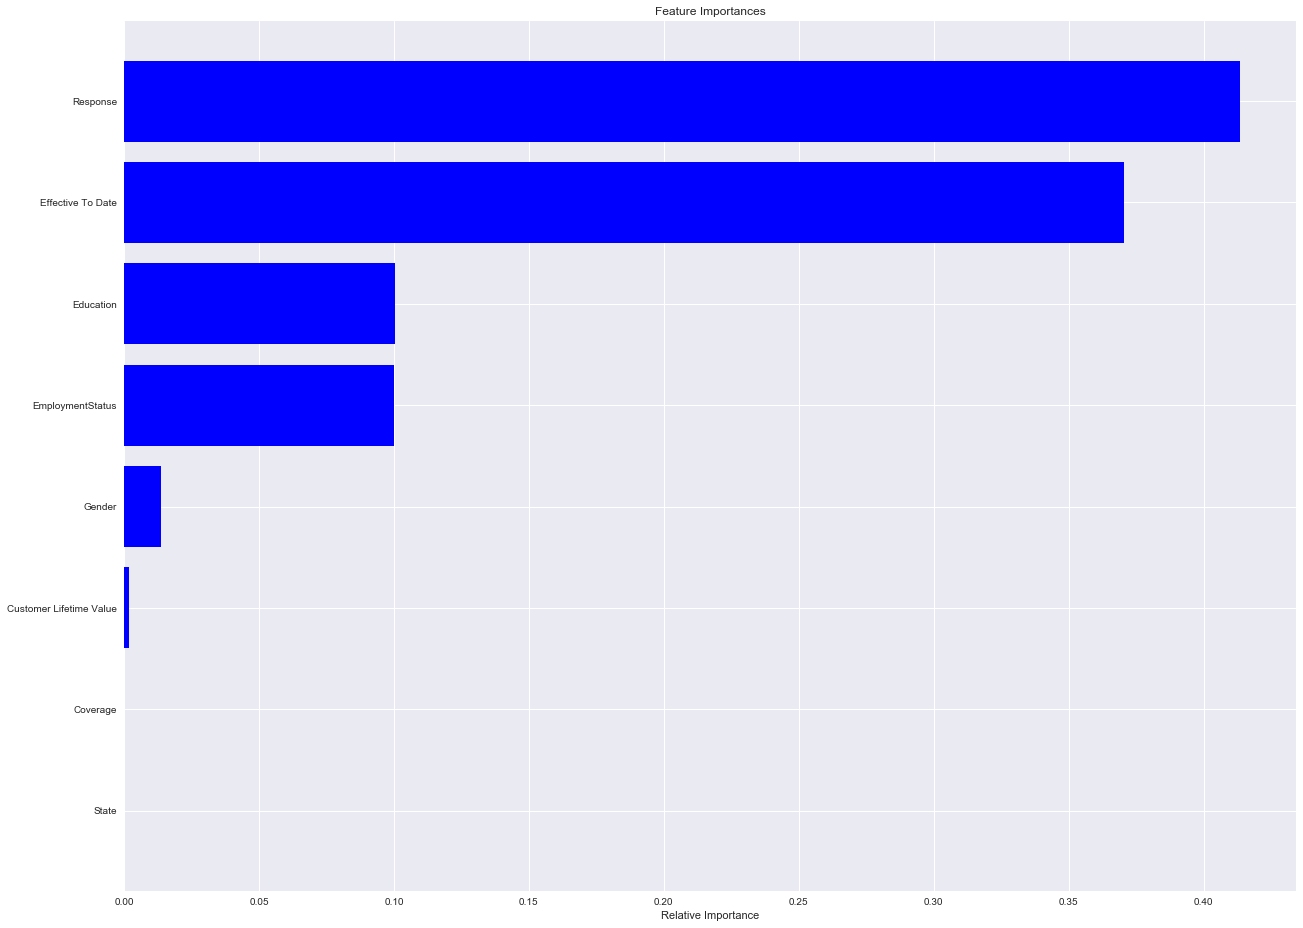

In [39]:
import matplotlib.pyplot as plt
print(dict(zip(df_clv.columns, clf.feature_importances_)))

feature_names = df_clv.columns
importances = clf.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
#from sklearn import tree 
from sklearn.tree import plot_tree

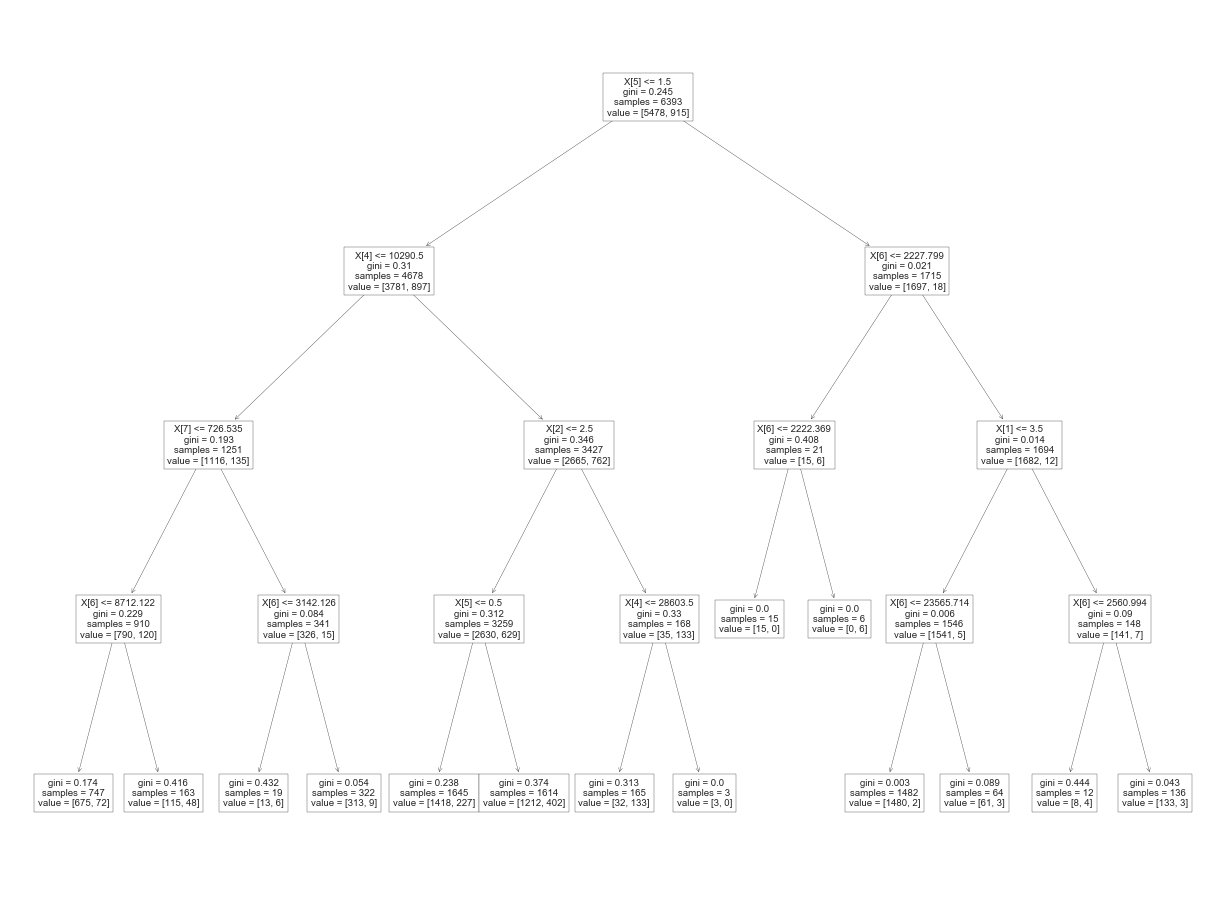

In [40]:
plt.rcParams["figure.figsize"] = [21,16]
tree.plot_tree(clf)